In [1]:
pip install pandas_datareader

In [2]:
pip install pypfopt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [6]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sn
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings("ignore")

sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

sp500["Ticker"] = sp500["Symbol"]

sp500["Ticker"] = sp500["Ticker"].str.replace("." , "-")

symbols_list = sp500["Ticker"].unique().tolist()

end_date = '2023-09-27'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date,
                 auto_adjust=False).stack()

[*********************100%***********************]  503 of 503 completed

4 Failed downloads:
['VLTO', 'GEV', 'SOLV', 'SW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-09-29 00:00:00 -> 2023-09-27) (Yahoo error = "Data doesn\'t exist for startDate = 1443499200, endDate = 1695787200")')


In [7]:
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Ticker
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,MMM
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,AOS
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,ABT
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),ABBV
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,ACN
...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011,XYL
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997,YUM
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969,ZBRA
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,ZBH


In [8]:
df.index.names = ['date', 'ticker']

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.251015   33.740002   34.060001   33.240002   33.360001   
           AAPL     24.536386   27.264999   28.377501   26.965000   28.207500   
           ABBV     35.061207   52.790001   54.189999   51.880001   53.099998   
           ABT      32.820744   39.500000   40.150002   39.029999   39.259998   
           ACGL     23.217773   24.416668   24.456667   24.100000   24.170000   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      87.981148   89.519997   90.849998   89.500000   90.379997   
           YUM     120.448669  124.010002  124.739998  123.449997  124.239998   
           ZBH     110.800156  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     173.604691  176.869995  178.449997  176.270004  176.580002   

Price                   volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
           ACGL      1888800.0  
...                        ...  
2023-09-26 XYL       1322400.0  
           YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZTS       1463200.0  

[980418 rows x 6 columns]

In [11]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2/2-(2*np.log(2)-1)*(np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb low'] = df.groupby(level=1)['adj close'].transform(lambda x:pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])

df['bb mid'] = df.groupby(level=1)['adj close'].transform(lambda x:pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])

df['bb high'] = df.groupby(level=1)['adj close'].transform(lambda x:pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])


In [12]:
#df.xs('LSG.OL', level=1)["rsi"].plot()

In [13]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.251015   33.740002   34.060001   33.240002   33.360001   
           AAPL     24.536386   27.264999   28.377501   26.965000   28.207500   
           ABBV     35.061207   52.790001   54.189999   51.880001   53.099998   
           ABT      32.820744   39.500000   40.150002   39.029999   39.259998   
           ACGL     23.217773   24.416668   24.456667   24.100000   24.170000   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      87.981148   89.519997   90.849998   89.500000   90.379997   
           YUM     120.448669  124.010002  124.739998  123.449997  124.239998   
           ZBH     110.800156  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     173.604691  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.001351        NaN       NaN   
           AAPL    293461600.0         -0.006207        NaN       NaN   
           ABBV     12842800.0         -0.065607        NaN       NaN   
           ABT      12287500.0         -0.011997        NaN       NaN   
           ACGL      1888800.0         -0.000516        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 XYL       1322400.0         -0.000167  26.146773  4.477311   
           YUM       1500600.0         -0.000317  36.057180  4.797300   
           ZBH       3610500.0         -0.000229  31.893231  4.739333   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZTS       1463200.0         -0.000036  42.623478  5.145043   

Price                bb mid   bb high  
date       ticker                      
2015-09-29 A            NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
           ACGL         NaN       NaN  
...                     ...       ...  
2023-09-26 XYL     4.559227  4.641143  
           YUM     4.827262  4.857224  
           ZBH     4.778997  4.818662  
           ZBRA    5.539167  5.677342  
           ZTS     5.203852  5.262662  

[980418 rows x 11 columns]

In [14]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data["high"],
                        low=stock_data["low"],
                        close=stock_data["close"],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df["atr"] = df.groupby(level=1, group_keys=False).apply(compute_atr)

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.251015   33.740002   34.060001   33.240002   33.360001   
           AAPL     24.536386   27.264999   28.377501   26.965000   28.207500   
           ABBV     35.061207   52.790001   54.189999   51.880001   53.099998   
           ABT      32.820744   39.500000   40.150002   39.029999   39.259998   
           ACGL     23.217773   24.416668   24.456667   24.100000   24.170000   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      87.981148   89.519997   90.849998   89.500000   90.379997   
           YUM     120.448669  124.010002  124.739998  123.449997  124.239998   
           ZBH     110.800156  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     173.604691  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.001351        NaN       NaN   
           AAPL    293461600.0         -0.006207        NaN       NaN   
           ABBV     12842800.0         -0.065607        NaN       NaN   
           ABT      12287500.0         -0.011997        NaN       NaN   
           ACGL      1888800.0         -0.000516        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 XYL       1322400.0         -0.000167  26.146773  4.477311   
           YUM       1500600.0         -0.000317  36.057180  4.797300   
           ZBH       3610500.0         -0.000229  31.893231  4.739333   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZTS       1463200.0         -0.000036  42.623478  5.145043   

Price                bb mid   bb high       atr  
date       ticker                                
2015-09-29 A            NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN  
...                     ...       ...       ...  
2023-09-26 XYL     4.559227  4.641143  0.033800  
           YUM     4.827262  4.857224  0.142547  
           ZBH     4.778997  4.818662 -0.381708  
           ZBRA    5.539167  5.677342 -0.057389  
           ZTS     5.203852  5.262662  0.651515  

[980418 rows x 12 columns]

In [15]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df["macd"] = df.groupby(level=1, group_keys = False)["adj close"].apply(compute_macd)

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.251015   33.740002   34.060001   33.240002   33.360001   
           AAPL     24.536386   27.264999   28.377501   26.965000   28.207500   
           ABBV     35.061207   52.790001   54.189999   51.880001   53.099998   
           ABT      32.820744   39.500000   40.150002   39.029999   39.259998   
           ACGL     23.217773   24.416668   24.456667   24.100000   24.170000   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      87.981148   89.519997   90.849998   89.500000   90.379997   
           YUM     120.448669  124.010002  124.739998  123.449997  124.239998   
           ZBH     110.800156  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     173.604691  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.001351        NaN       NaN   
           AAPL    293461600.0         -0.006207        NaN       NaN   
           ABBV     12842800.0         -0.065607        NaN       NaN   
           ABT      12287500.0         -0.011997        NaN       NaN   
           ACGL      1888800.0         -0.000516        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 XYL       1322400.0         -0.000167  26.146773  4.477311   
           YUM       1500600.0         -0.000317  36.057180  4.797300   
           ZBH       3610500.0         -0.000229  31.893231  4.739333   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZTS       1463200.0         -0.000036  42.623478  5.145043   

Price                bb mid   bb high       atr      macd  
date       ticker                                          
2015-09-29 A            NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2023-09-26 XYL     4.559227  4.641143  0.033800 -2.159188  
           YUM     4.827262  4.857224  0.142547 -1.363697  
           ZBH     4.778997  4.818662 -0.381708 -0.881067  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791  
           ZTS     5.203852  5.262662  0.651515 -1.188277  

[980418 rows x 13 columns]

In [16]:
df["nok_volume"] = (df["adj close"]*df["volume"])/1e6

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.251015   33.740002   34.060001   33.240002   33.360001   
           AAPL     24.536386   27.264999   28.377501   26.965000   28.207500   
           ABBV     35.061207   52.790001   54.189999   51.880001   53.099998   
           ABT      32.820744   39.500000   40.150002   39.029999   39.259998   
           ACGL     23.217773   24.416668   24.456667   24.100000   24.170000   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      87.981148   89.519997   90.849998   89.500000   90.379997   
           YUM     120.448669  124.010002  124.739998  123.449997  124.239998   
           ZBH     110.800156  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     173.604691  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.001351        NaN       NaN   
           AAPL    293461600.0         -0.006207        NaN       NaN   
           ABBV     12842800.0         -0.065607        NaN       NaN   
           ABT      12287500.0         -0.011997        NaN       NaN   
           ACGL      1888800.0         -0.000516        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 XYL       1322400.0         -0.000167  26.146773  4.477311   
           YUM       1500600.0         -0.000317  36.057180  4.797300   
           ZBH       3610500.0         -0.000229  31.893231  4.739333   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZTS       1463200.0         -0.000036  42.623478  5.145043   

Price                bb mid   bb high       atr      macd   nok_volume  
date       ticker                                                       
2015-09-29 A            NaN       NaN       NaN       NaN    70.389786  
           AAPL         NaN       NaN       NaN       NaN  7200.487238  
           ABBV         NaN       NaN       NaN       NaN   450.284067  
           ABT          NaN       NaN       NaN       NaN   403.284887  
           ACGL         NaN       NaN       NaN       NaN    43.853730  
...                     ...       ...       ...       ...          ...  
2023-09-26 XYL     4.559227  4.641143  0.033800 -2.159188   116.346270  
           YUM     4.827262  4.857224  0.142547 -1.363697   180.745273  
           ZBH     4.778997  4.818662 -0.381708 -0.881067   400.043962  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791    79.595386  
           ZTS     5.203852  5.262662  0.651515 -1.188277   254.018383  

[980418 rows x 14 columns]

In [17]:
last_cols = [c for c in df.columns.unique(0) if c not in ["nok_volume", "volume",
                                                          "open", "high", "low", "close"]]

#last_cols
data = pd.concat([df.unstack("ticker")["nok_volume"].resample("M").mean().stack("ticker").to_frame("nok_volume"), 
           df.unstack()[last_cols][last_cols].resample("M").last().stack("ticker")],
          axis=1).dropna()

data

nok_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                         
2015-11-30 A        134.988330   38.734951         -0.002430  73.421350   
           AAPL    4005.252726   26.729137         -0.003654  55.537333   
           ABBV     325.730920   38.977573         -0.070930  49.376884   
           ABT      207.499333   37.540993         -0.013992  56.962617   
           ACGL      28.174423   22.970539         -0.001121  35.682522   
...                        ...         ...               ...        ...   
2023-09-30 EXE      116.689765   79.277847         -0.000348  44.326469   
           COIN     506.793576   70.519997          0.001007  39.839731   
           CEG      195.364204  107.145668         -0.000064  55.245474   
           GEHC     211.929508   66.022316          0.000183  40.922322   
           KVUE     646.494238   19.281168         -0.001506  35.706330   

                     bb low    bb mid   bb high       atr      macd  
date       ticker                                                    
2015-11-30 A       3.538792  3.611226  3.683660 -1.033887  0.567157  
           AAPL    3.277189  3.320493  3.363797 -0.967900 -0.142789  
           ABBV    3.691885  3.740093  3.788301 -0.526809  0.145677  
           ABT     3.636724  3.658567  3.680410 -1.064842  0.335558  
           ACGL    3.177974  3.195190  3.212406 -1.155694 -0.550166  
...                     ...       ...       ...       ...       ...  
2023-09-30 EXE     4.369459  4.422967  4.476475 -1.067686 -0.831788  
           COIN    4.273572  4.378785  4.483998 -1.183735  0.049978  
           CEG     4.645547  4.685718  4.725889 -0.436215  0.366876  
           GEHC    4.153828  4.211363  4.268898 -0.893478 -1.116462  
           KVUE    2.979201  3.054020  3.128840 -0.899746 -1.435621  

[46291 rows x 9 columns]

In [18]:
data ["nok_volume"] = data["nok_volume"].unstack("ticker").rolling(1*12).mean().stack()

data["dollar_vol_rank"] = (data.groupby("date")["nok_volume"].rank(ascending=False))

data = data[data["dollar_vol_rank"]<150].drop(["dollar_vol_rank", "nok_volume"], axis=1)

data

adj close  garman_klass_vol        rsi    bb low  \
date       ticker                                                      
2016-10-31 AAPL     26.090466         -0.002767  49.891192  3.289745   
           ABBV     38.834366         -0.056807  27.477839  3.718614   
           ABT      33.619495         -0.009785  38.008909  3.535356   
           ACN     101.760162         -0.006263  53.823654  4.619889   
           ADBE    107.510002          0.000059  53.668389  4.679513   
...                       ...               ...        ...       ...   
2023-09-30 UBER     44.270000          0.000441  45.005268  3.806654   
           CRWD    160.479996          0.000144  51.534803  5.026187   
           PLTR     13.960000          0.000214  41.544692  2.701939   
           ABNB    132.279999          0.000213  44.494127  4.857047   
           COIN     70.519997          0.001007  39.839731  4.273572   

                     bb mid   bb high       atr      macd  
date       ticker                                          
2016-10-31 AAPL    3.318620  3.347495 -1.038688 -0.195978  
           ABBV    3.772733  3.826853 -0.893132 -0.760593  
           ABT     3.585802  3.636249 -1.035224 -0.650888  
           ACN     4.631525  4.643160 -0.996806 -0.135457  
           ADBE    4.694639  4.709766 -1.230331 -0.109039  
...                     ...       ...       ...       ...  
2023-09-30 UBER    3.862227  3.917801 -0.746098 -0.133973  
           CRWD    5.103696  5.181204 -0.744862  0.245950  
           PLTR    2.779743  2.857548 -0.426167 -0.433581  
           ABNB    4.940924  5.024801 -1.006939 -0.037854  
           COIN    4.378785  4.483998 -1.183735  0.049978  

[12516 rows x 8 columns]

In [19]:
#g = df.xs("SATS.OL", level=1)

def calculate_returns(df):
    outlier_cutoff = 0.005
    
    lags = [1,2,3,6,9,12]
    
    for lag in lags:
    
        df[f'return_{lag}m'] = (df["adj close"]
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
    
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df

data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

In [20]:
data

adj close  garman_klass_vol        rsi    bb low  \
date       ticker                                                      
2017-10-31 AAPL     39.529034         -0.001263  69.196769  3.590193   
           ABBV     65.125328         -0.042702  55.247925  4.161565   
           ABT      47.540344         -0.007128  53.844939  3.873128   
           ACN     127.138954         -0.005423  69.365216  4.785195   
           ADBE    175.160004          0.000067  70.089317  4.951759   
...                       ...               ...        ...       ...   
2023-09-30 UBER     44.270000          0.000441  45.005268  3.806654   
           CRWD    160.479996          0.000144  51.534803  5.026187   
           PLTR     13.960000          0.000214  41.544692  2.701939   
           ABNB    132.279999          0.000213  44.494127  4.857047   
           COIN     70.519997          0.001007  39.839731  4.273572   

                     bb mid   bb high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAPL    3.637059  3.683926 -0.906642 -0.039276   0.096808   
           ABBV    4.207901  4.254238  0.375557  0.473815   0.022728   
           ABT     3.896688  3.920248 -1.040044  0.276133   0.021276   
           ACN     4.824869  4.864543 -0.986514  0.352342   0.064180   
           ADBE    5.089292  5.226825 -0.888269  0.612102   0.174152   
...                     ...       ...       ...       ...        ...   
2023-09-30 UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   
           CRWD    5.103696  5.181204 -0.744862  0.245950  -0.015641   
           PLTR    2.779743  2.857548 -0.426167 -0.433581  -0.068091   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   
           COIN    4.378785  4.483998 -1.183735  0.049978  -0.114070   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2017-10-31 AAPL     0.015250   0.044955   0.028875   0.038941    0.035228  
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026  
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294  
           ACN      0.048454   0.037203   0.028692   0.027398    0.018728  
           ADBE     0.062497   0.061392   0.045993   0.049515    0.041515  
...                      ...        ...        ...        ...         ...  
2023-09-30 UBER    -0.053920   0.008422   0.057244   0.066838    0.043691  
           CRWD    -0.003656   0.029981   0.026391   0.047942   -0.002216  
           PLTR    -0.161174  -0.030723   0.100935   0.071471    0.050604  
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401  
           COIN    -0.154340  -0.004822   0.007147   0.079010    0.007477  

[10018 rows x 14 columns]

In [21]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
              "famafrench",
              start="2010")[0].drop("RF", axis=1)

In [22]:
factor_data.index = factor_data.index.to_timestamp()

In [23]:
factor_data = factor_data.resample("M").last().div(100)

In [24]:
factor_data.index.name = "date"

In [25]:
factor_data = factor_data.join(data["return_1m"]).sort_index()

In [26]:
#factor_data.xs("SATS.OL", level=1).head()

In [27]:
observations = factor_data.groupby(level=1).size()

valid_stocks = observations[observations >= 10]

factor_data = factor_data[~factor_data.index.get_level_values("ticker").isin(valid_stocks)]

In [28]:
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAPL    0.0225 -0.0194  0.0019  0.0091 -0.0326   0.096808
           ABBV    0.0225 -0.0194  0.0019  0.0091 -0.0326   0.022728
           ABT     0.0225 -0.0194  0.0019  0.0091 -0.0326   0.021276
           ACN     0.0225 -0.0194  0.0019  0.0091 -0.0326   0.064180
           ADBE    0.0225 -0.0194  0.0019  0.0091 -0.0326   0.174152
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VZ     -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.056890
           WDAY   -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.062413
           WFC    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.015500
           WMT    -0.0524 -0.0179  0.0145  0.0185 -0.0084  -0.000676
           XOM    -0.0524 -0.0179  0.0145  0.0185 -0.0084   0.046947

[10018 rows x 6 columns]

In [29]:
def run_rolling_ols(x):
    n_obs = x.shape[0]
    X = x.drop('return_1m', axis=1)
    n_regressors = X.shape[1] + 1  # +1 for constant
    window = min(24, n_obs)
    min_nobs = max(n_regressors + 1, min(window - 1, n_obs))

    if min_nobs >= window:
        # Not enough data to run RollingOLS safely
        return pd.DataFrame(index=x.index, columns=X.columns)

    model = RollingOLS(
        endog=x['return_1m'],
        exog=sn.add_constant(X),
        window=window,
        min_nobs=min_nobs
    ).fit(params_only=True)

    return model.params.drop('const', axis=1)

betas = factor_data.groupby(level=1, group_keys=False).apply(run_rolling_ols)

In [30]:
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-10-31 AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 VZ      0.329036 -0.163597  0.272320  0.320803  0.096975
           WDAY    1.085504 -0.908080 -0.596800 -0.906440 -0.196881
           WFC     1.112946  0.306860  2.044026 -0.451836 -1.511412
           WMT     0.703225 -0.309992 -0.427581 -0.156630  0.526794
           XOM     0.972447 -1.081438  1.740413 -0.634735 -0.371114

[10018 rows x 5 columns]

In [31]:
data = data.join(betas.groupby("ticker").shift())

In [32]:
factors = ["Mkt-RF","SMB","HML","RMW","CMA"]

In [33]:
data.loc[:,factors] = data.groupby("ticker", group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

In [34]:
data

adj close  garman_klass_vol        rsi    bb low  \
date       ticker                                                      
2017-10-31 AAPL     39.529034         -0.001263  69.196769  3.590193   
           ABBV     65.125328         -0.042702  55.247925  4.161565   
           ABT      47.540344         -0.007128  53.844939  3.873128   
           ACN     127.138954         -0.005423  69.365216  4.785195   
           ADBE    175.160004          0.000067  70.089317  4.951759   
...                       ...               ...        ...       ...   
2023-09-30 UBER     44.270000          0.000441  45.005268  3.806654   
           CRWD    160.479996          0.000144  51.534803  5.026187   
           PLTR     13.960000          0.000214  41.544692  2.701939   
           ABNB    132.279999          0.000213  44.494127  4.857047   
           COIN     70.519997          0.001007  39.839731  4.273572   

                     bb mid   bb high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAPL    3.637059  3.683926 -0.906642 -0.039276   0.096808   
           ABBV    4.207901  4.254238  0.375557  0.473815   0.022728   
           ABT     3.896688  3.920248 -1.040044  0.276133   0.021276   
           ACN     4.824869  4.864543 -0.986514  0.352342   0.064180   
           ADBE    5.089292  5.226825 -0.888269  0.612102   0.174152   
...                     ...       ...       ...       ...        ...   
2023-09-30 UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   
           CRWD    5.103696  5.181204 -0.744862  0.245950  -0.015641   
           PLTR    2.779743  2.857548 -0.426167 -0.433581  -0.068091   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   
           COIN    4.378785  4.483998 -1.183735  0.049978  -0.114070   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2017-10-31 AAPL     0.015250   0.044955   0.028875   0.038941    0.035228   
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026   
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294   
           ACN      0.048454   0.037203   0.028692   0.027398    0.018728   
           ADBE     0.062497   0.061392   0.045993   0.049515    0.041515   
...                      ...        ...        ...        ...         ...   
2023-09-30 UBER    -0.053920   0.008422   0.057244   0.066838    0.043691   
           CRWD    -0.003656   0.029981   0.026391   0.047942   -0.002216   
           PLTR    -0.161174  -0.030723   0.100935   0.071471    0.050604   
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401   
           COIN    -0.154340  -0.004822   0.007147   0.079010    0.007477   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2017-10-31 AAPL    1.276809 -0.274812 -0.585545  0.639679  0.443303  
           ABBV    0.499081  0.359310 -0.032821  0.212861  0.172831  
           ABT     0.829184 -0.188544 -0.540949  0.257529  0.978612  
           ACN     1.197553 -0.163036 -0.326805  0.271912  0.164497  
           ADBE    1.114761 -0.330562 -0.170804 -0.218007 -0.696377  
...                     ...       ...       ...       ...       ...  
2023-09-30 UBER    1.090266  1.140600 -0.263071 -1.534224 -0.434869  
           CRWD    0.604910 -0.960057 -0.682940 -2.482535 -0.810270  
           PLTR         NaN       NaN       NaN       NaN       NaN  
           ABNB         NaN       NaN       NaN       NaN       NaN  
           COIN         NaN       NaN       NaN       NaN       NaN  

[10018 rows x 19 columns]

In [35]:
data = data.dropna()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9582 entries, (Timestamp('2017-10-31 00:00:00'), 'AAPL') to (Timestamp('2023-09-30 00:00:00'), 'CRWD')
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   adj close         9582 non-null   float64
 1   garman_klass_vol  9582 non-null   float64
 2   rsi               9582 non-null   float64
 3   bb low            9582 non-null   float64
 4   bb mid            9582 non-null   float64
 5   bb high           9582 non-null   float64
 6   atr               9582 non-null   float64
 7   macd              9582 non-null   float64
 8   return_1m         9582 non-null   float64
 9   return_2m         9582 non-null   float64
 10  return_3m         9582 non-null   float64
 11  return_6m         9582 non-null   float64
 12  return_9m         9582 non-null   float64
 13  return_12m        9582 non-null   float64
 14  Mkt-RF            9582 non-null   float64
 15  SMB       

In [37]:
data = data.drop("adj close", axis=1)

In [38]:
from sklearn.cluster import KMeans

In [43]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [45]:
def get_clusters(df):
    df["cluster"] = KMeans(n_clusters=4, 
                          random_state=0,
                          init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby("date", group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb low    bb mid   bb high  \
date       ticker                                                              
2017-10-31 AAPL           -0.001263  69.196769  3.590193  3.637059  3.683926   
           ABBV           -0.042702  55.247925  4.161565  4.207901  4.254238   
           ABT            -0.007128  53.844939  3.873128  3.896688  3.920248   
           ACN            -0.005423  69.365216  4.785195  4.824869  4.864543   
           ADBE            0.000067  70.089317  4.951759  5.089292  5.226825   
...                             ...        ...       ...       ...       ...   
2023-09-30 WMT            -0.000186  54.722570  3.974950  3.992416  4.009883   
           XOM            -0.001011  59.440177  4.653137  4.693220  4.733304   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   
           UBER            0.000441  45.005268  3.806654  3.862227  3.917801   
           CRWD            0.000144  51.534803  5.026187  5.103696  5.181204   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-10-31 AAPL   -0.906642 -0.039276   0.096808   0.015250   0.044955   
           ABBV    0.375557  0.473815   0.022728   0.098590   0.091379   
           ABT    -1.040044  0.276133   0.021276   0.034308   0.034801   
           ACN    -0.986514  0.352342   0.064180   0.048454   0.037203   
           ADBE   -0.888269  0.612102   0.174152   0.062497   0.061392   
...                     ...       ...        ...        ...        ...   
2023-09-30 WMT    -0.196381  0.399458  -0.000676   0.010014   0.012354   
           XOM     0.601335  1.400624   0.046947   0.046139   0.030496   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   
           UBER   -0.746098 -0.133973  -0.062672  -0.053920   0.008422   
           CRWD   -0.744862  0.245950  -0.015641  -0.003656   0.029981   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAPL     0.028875   0.038941    0.035228  1.276809 -0.274812   
           ABBV     0.056495   0.047273    0.044026  0.499081  0.359310   
           ABT      0.038672   0.031320    0.029294  0.829184 -0.188544   
           ACN      0.028692   0.027398    0.018728  1.197553 -0.163036   
           ADBE     0.045993   0.049515    0.041515  1.114761 -0.330562   
...                      ...        ...         ...       ...       ...   
2023-09-30 WMT      0.017574   0.016553    0.020256  0.743594 -0.256720   
           XOM      0.012838   0.008747    0.027037  0.996160 -1.039312   
           MRNA    -0.071952  -0.064976   -0.015431  1.158937  0.746553   
           UBER     0.057244   0.066838    0.043691  1.090266  1.140600   
           CRWD     0.026391   0.047942   -0.002216  0.604910 -0.960057   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-10-31 AAPL   -0.585545  0.639679  0.443303        3  
           ABBV   -0.032821  0.212861  0.172831        2  
           ABT    -0.540949  0.257529  0.978612        2  
           ACN    -0.326805  0.271912  0.164497        3  
           ADBE   -0.170804 -0.218007 -0.696377        3  
...                     ...       ...       ...      ...  
2023-09-30 WMT    -0.535740 -0.139711  0.661321        2  
           XOM     1.691437 -0.669413 -0.285603        3  
           MRNA   -1.134033  0.610472  0.970465        1  
           UBER   -0.263071 -1.534224 -0.434869        1  
           CRWD   -0.682940 -2.482535 -0.810270        2  

[9582 rows x 19 columns]

In [47]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return



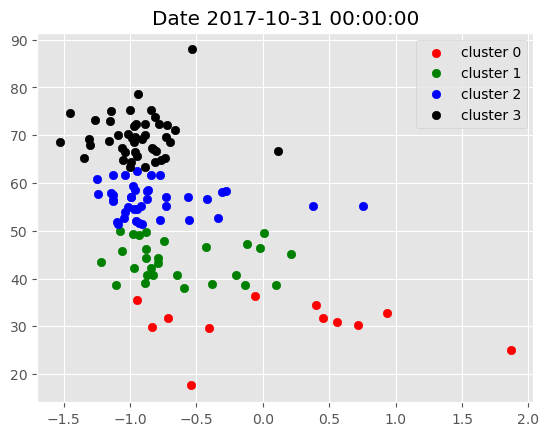

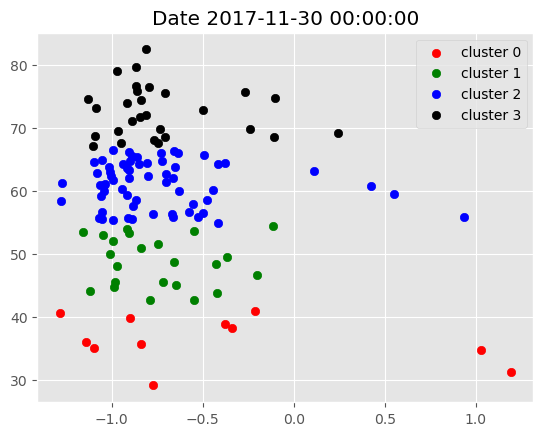

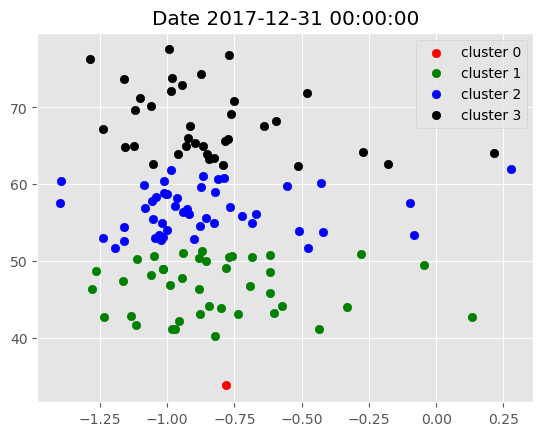

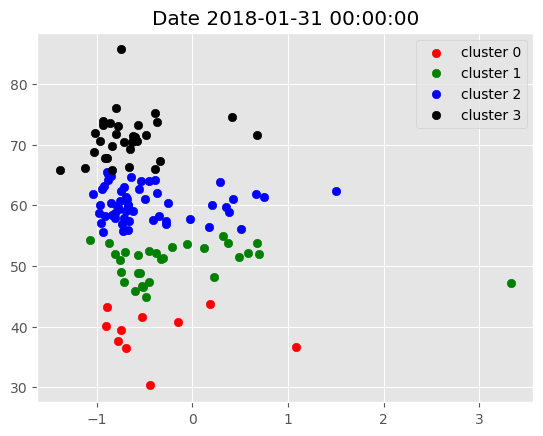

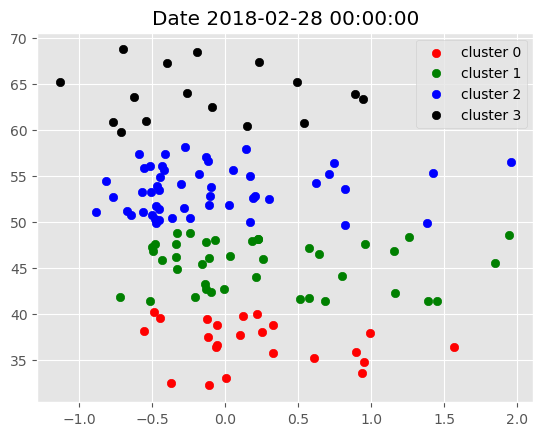

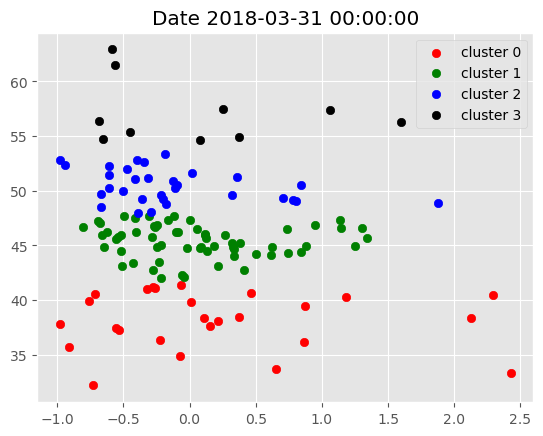

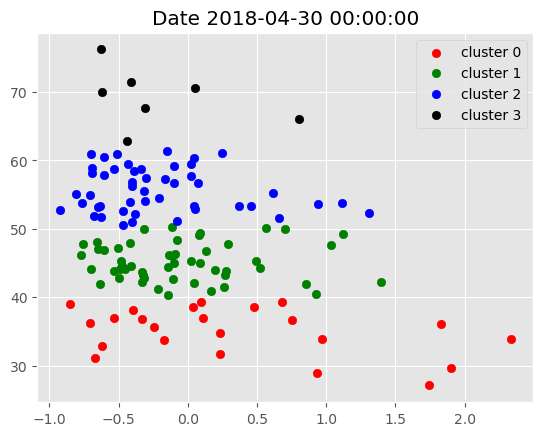

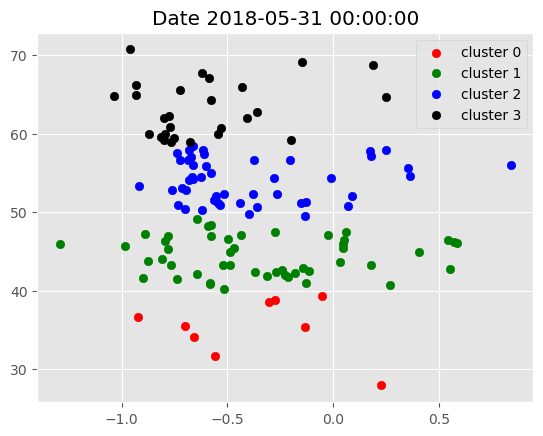

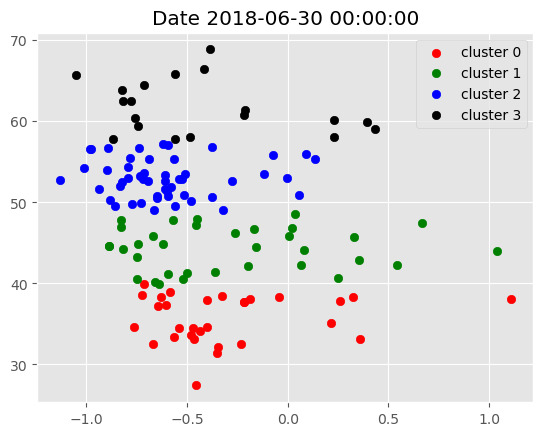

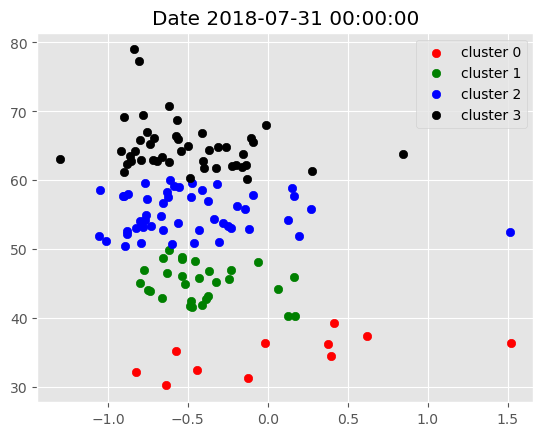

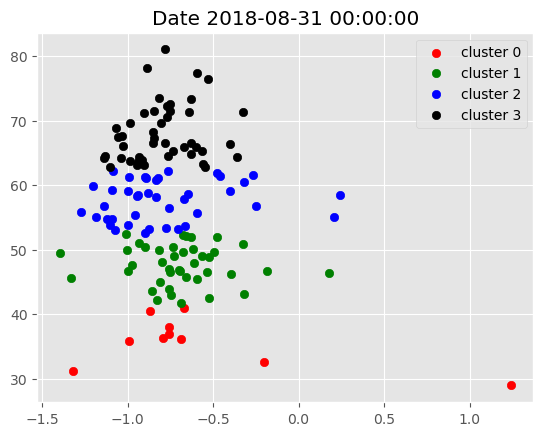

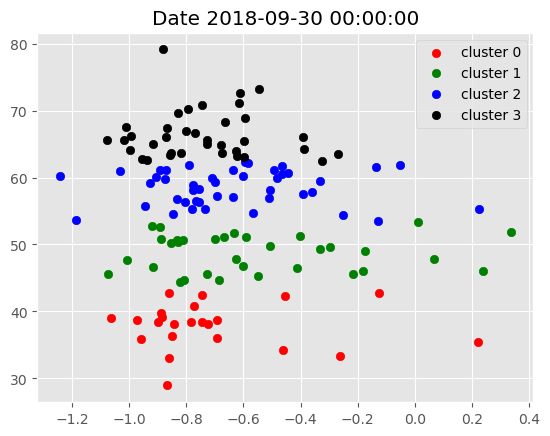

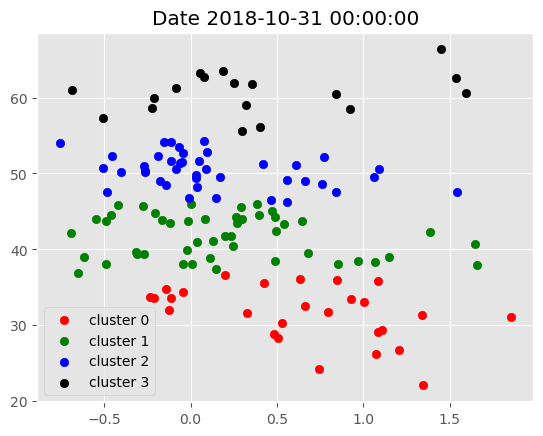

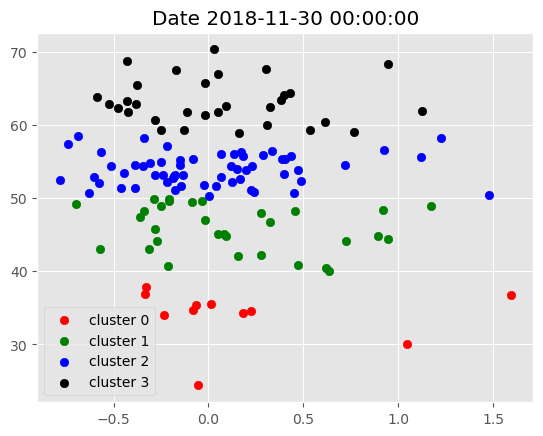

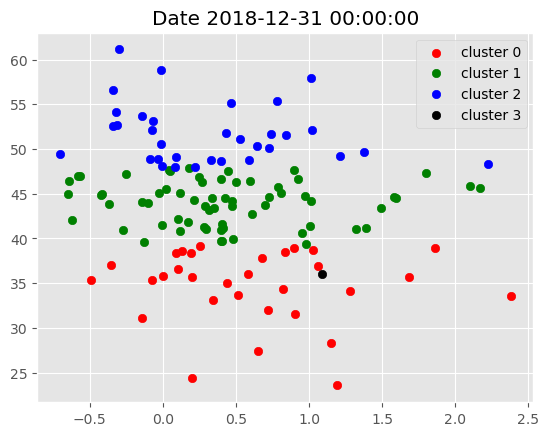

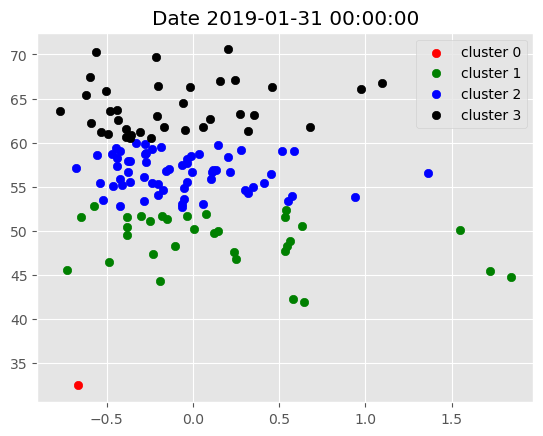

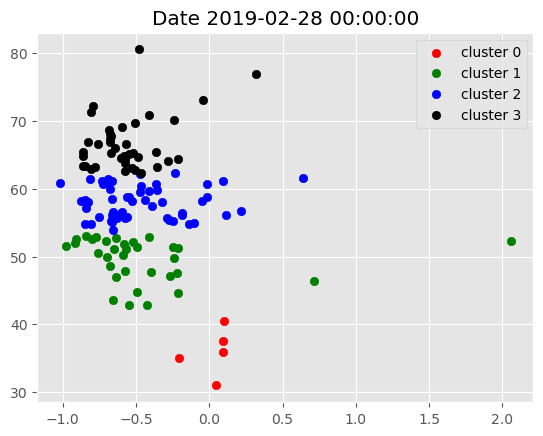

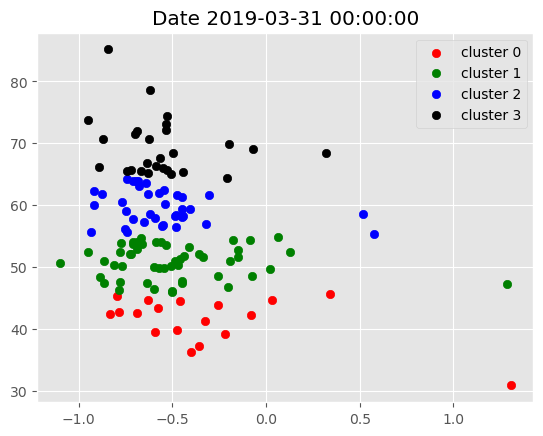

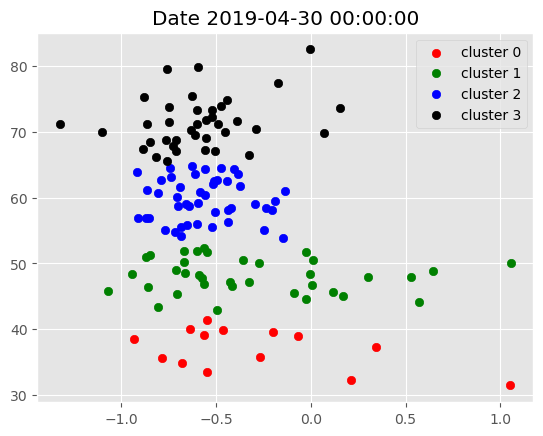

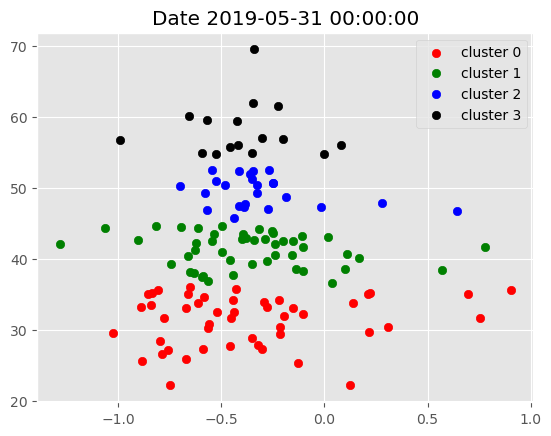

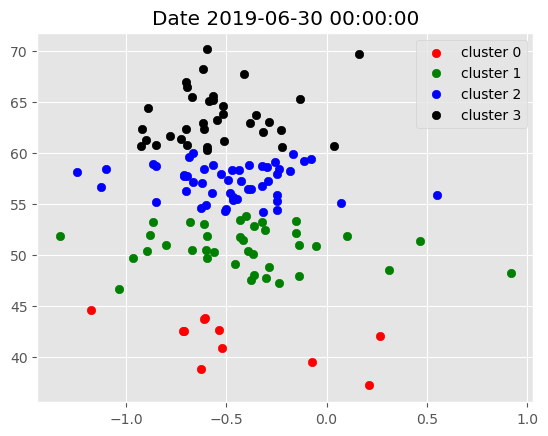

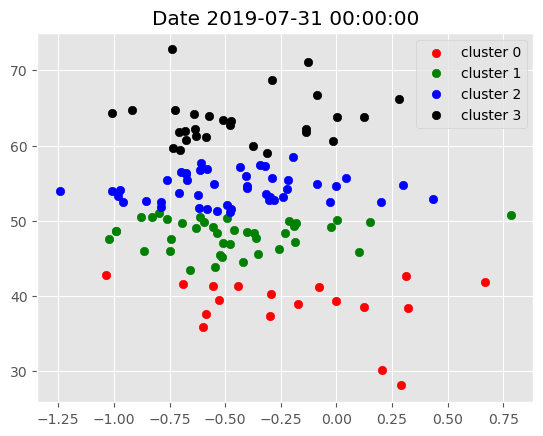

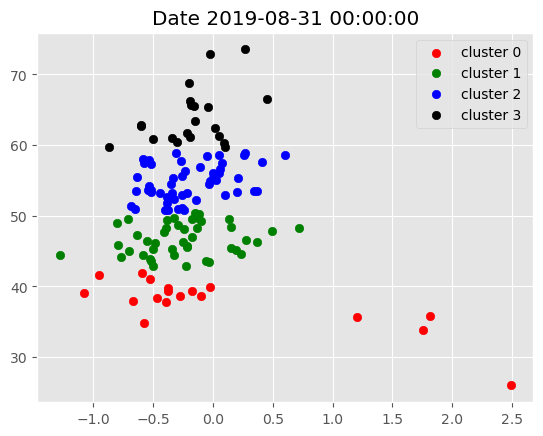

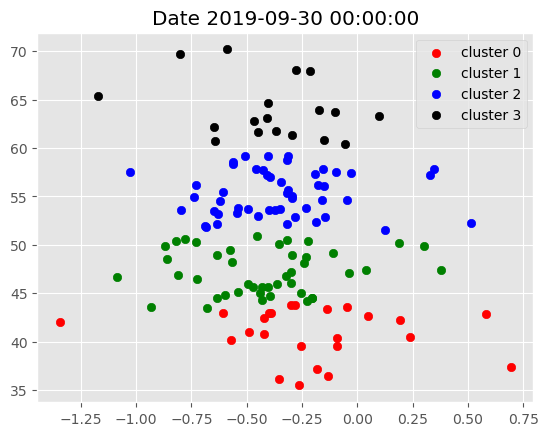

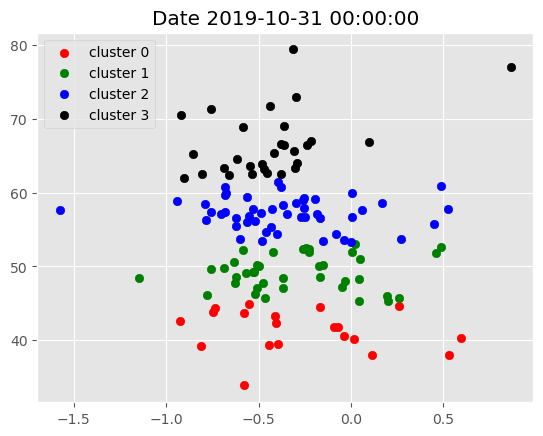

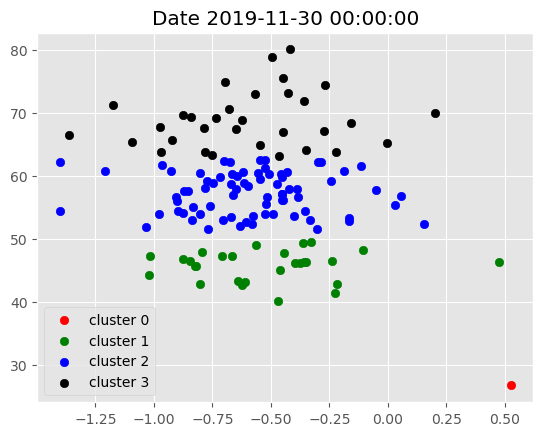

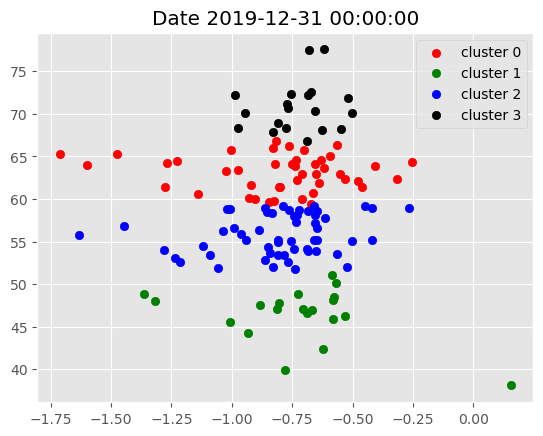

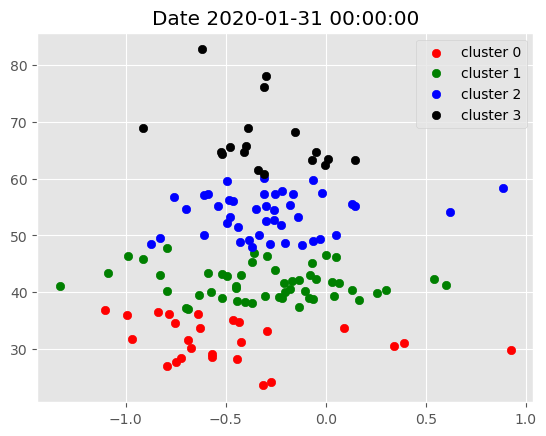

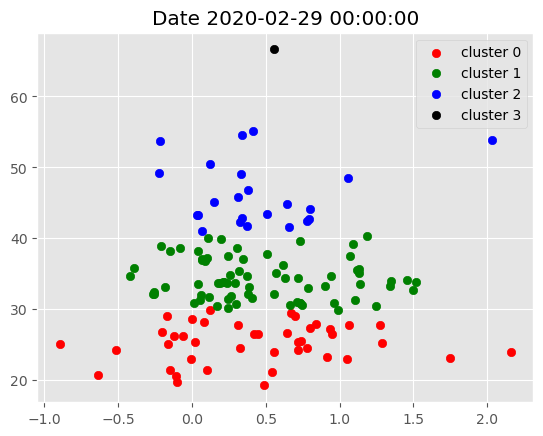

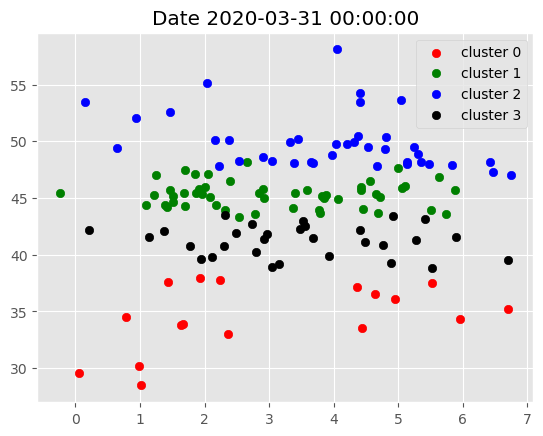

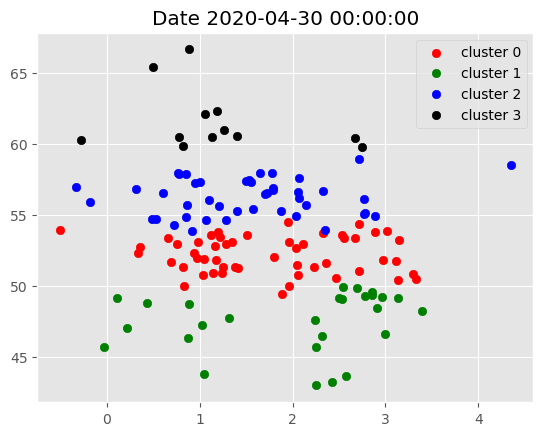

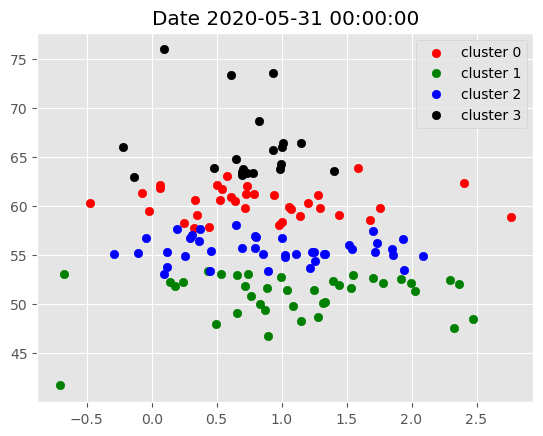

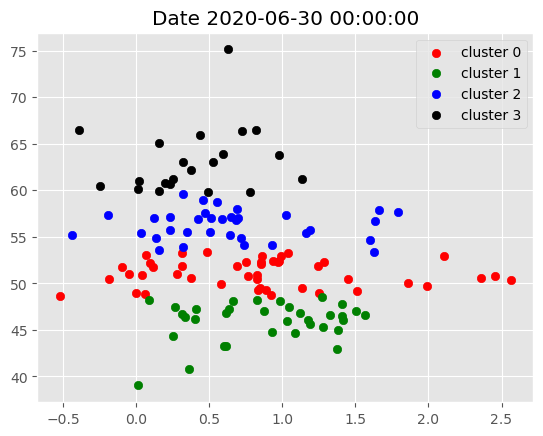

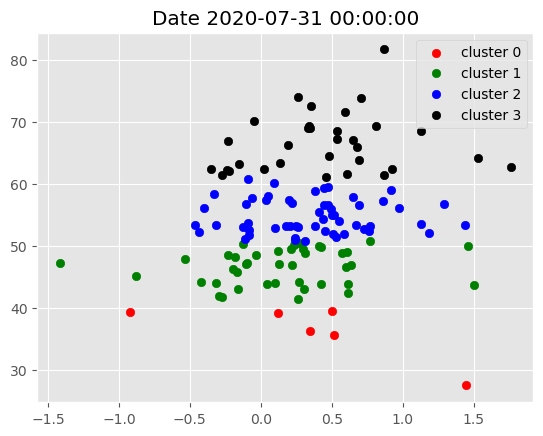

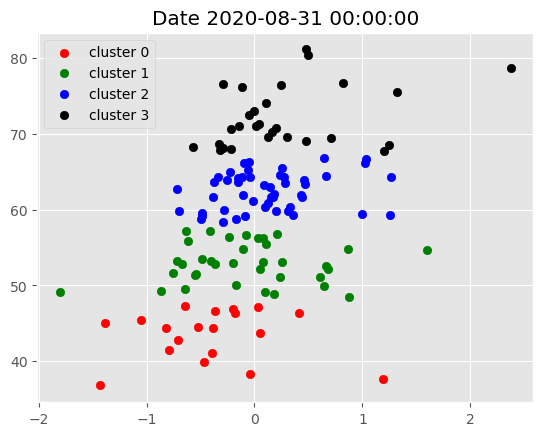

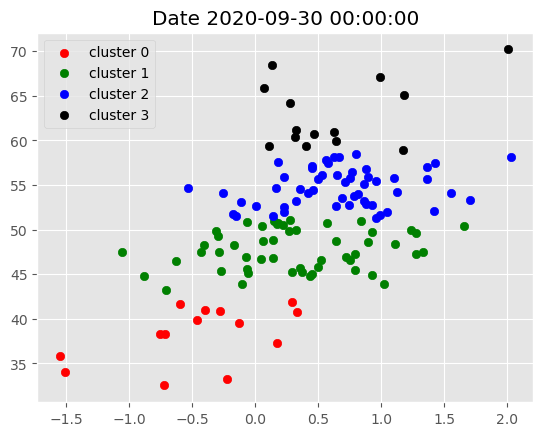

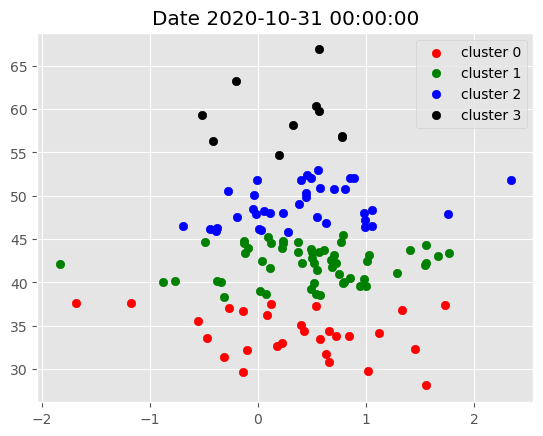

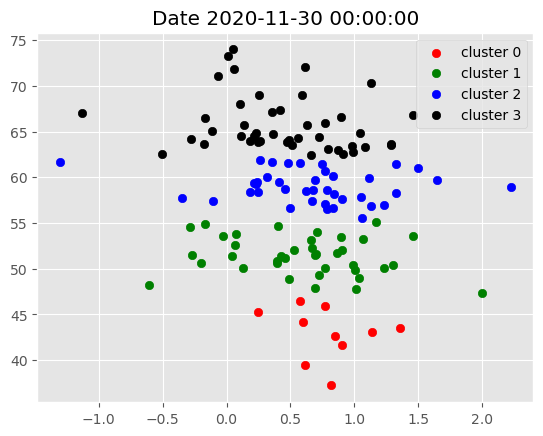

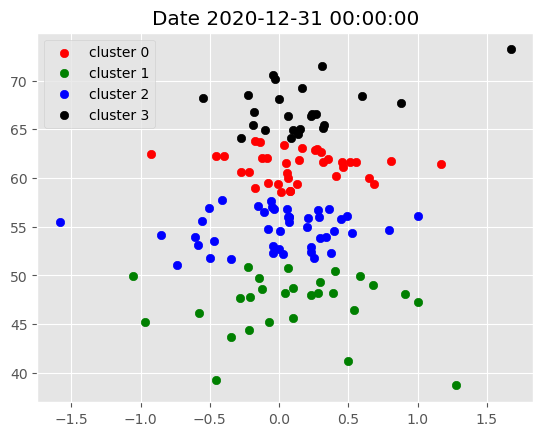

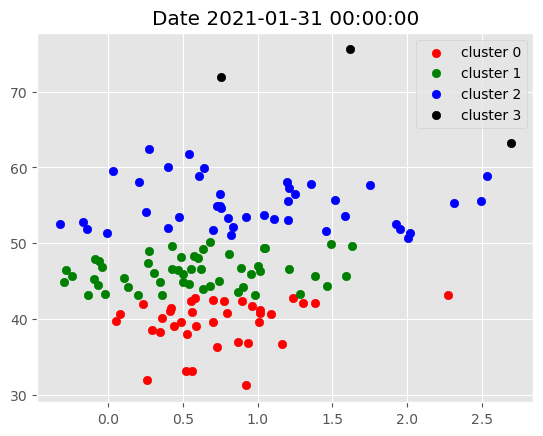

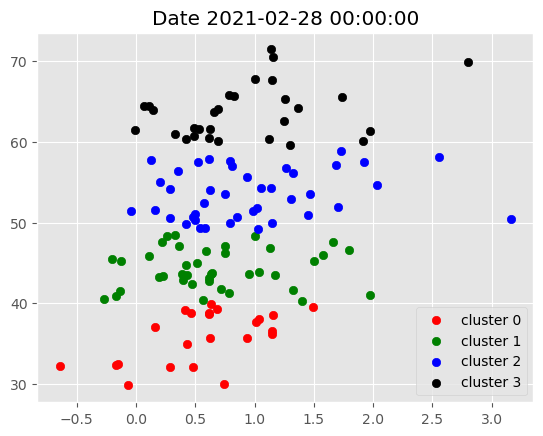

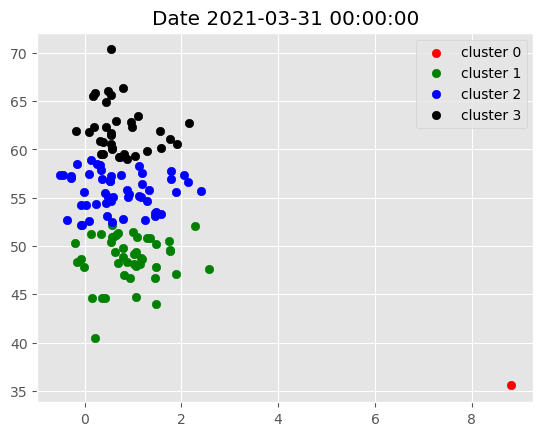

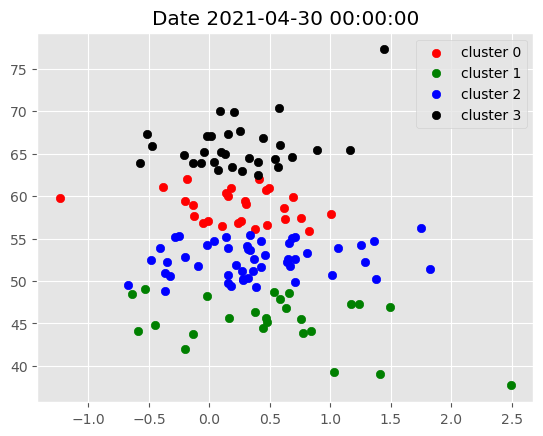

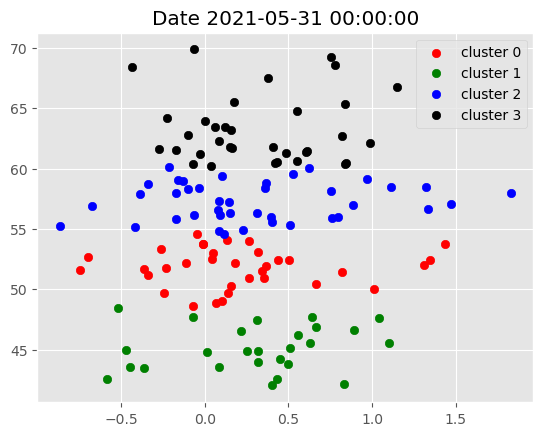

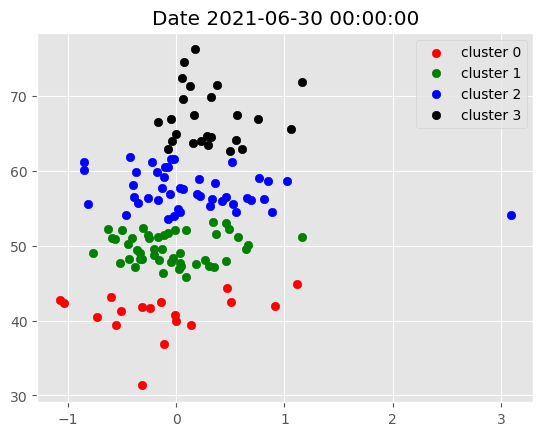

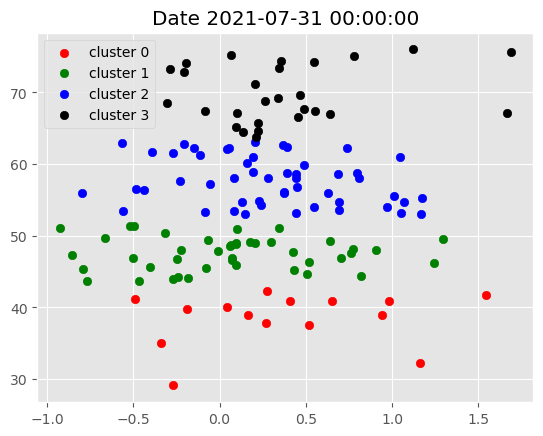

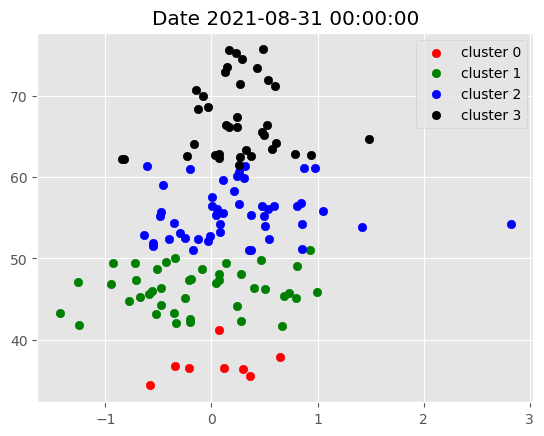

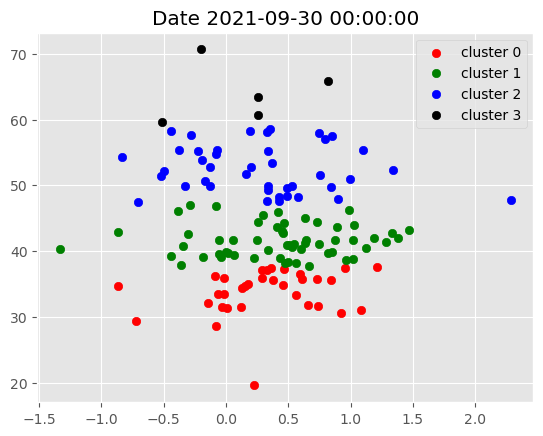

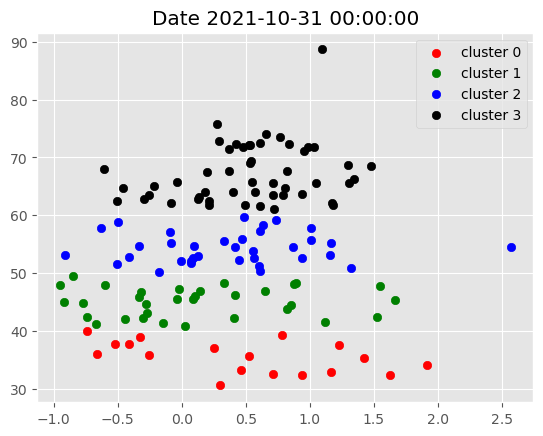

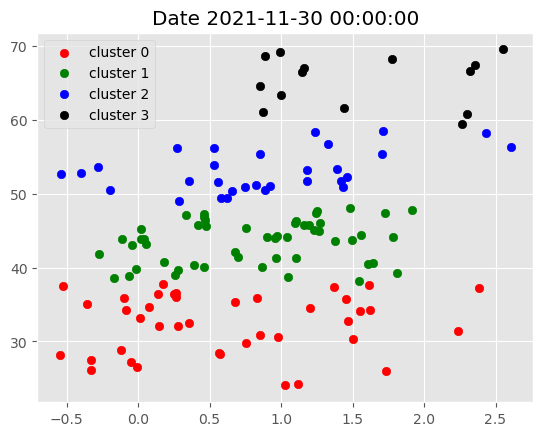

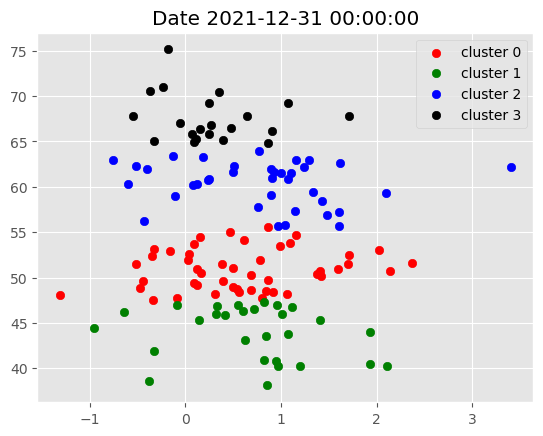

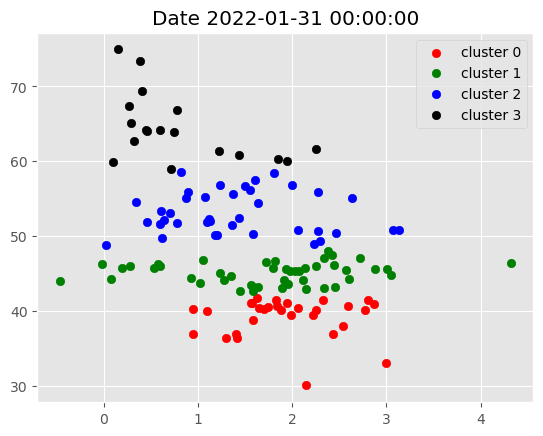

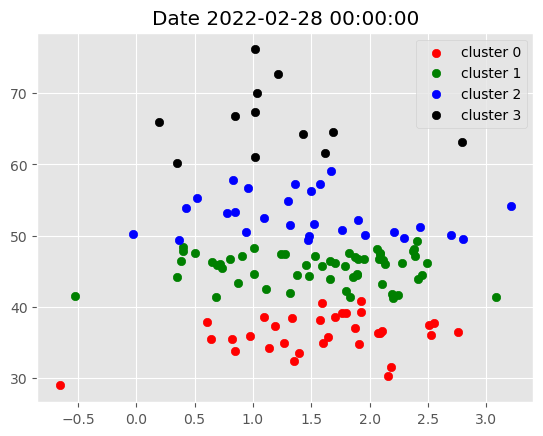

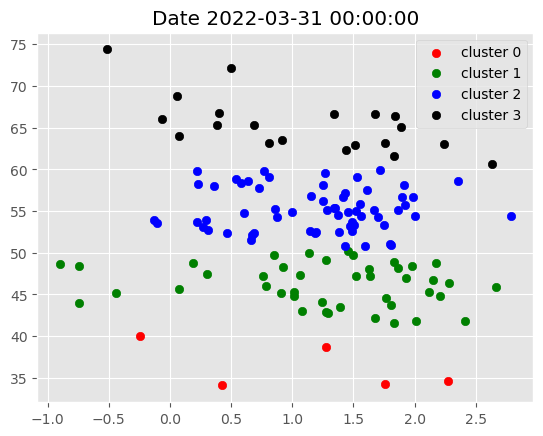

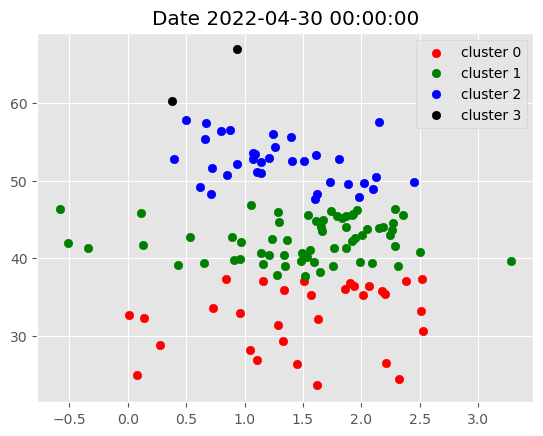

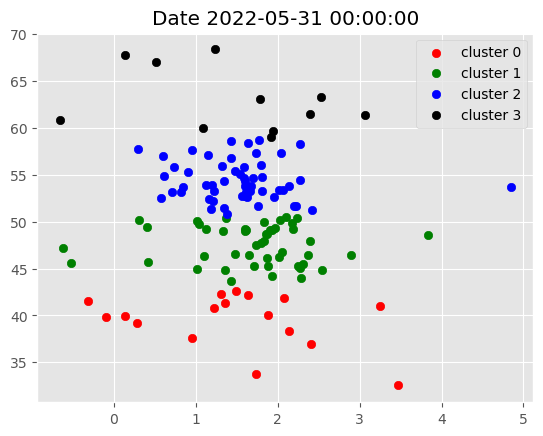

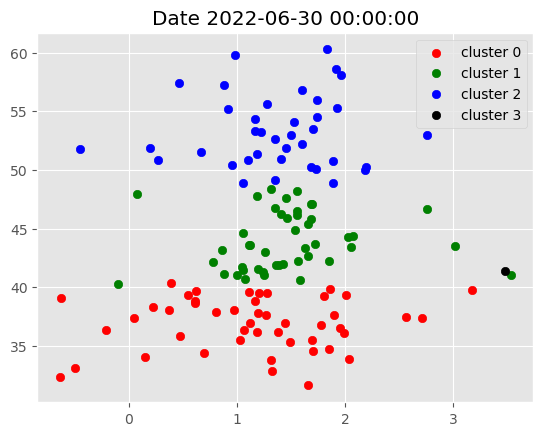

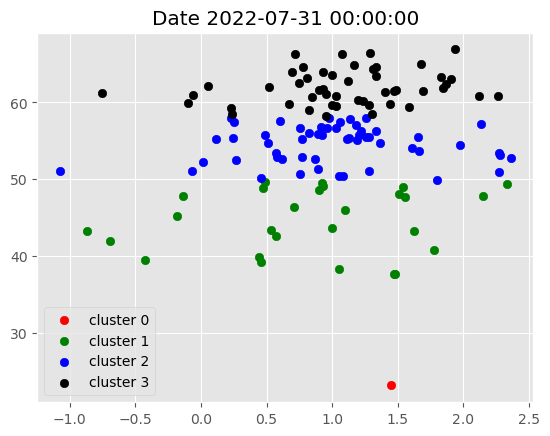

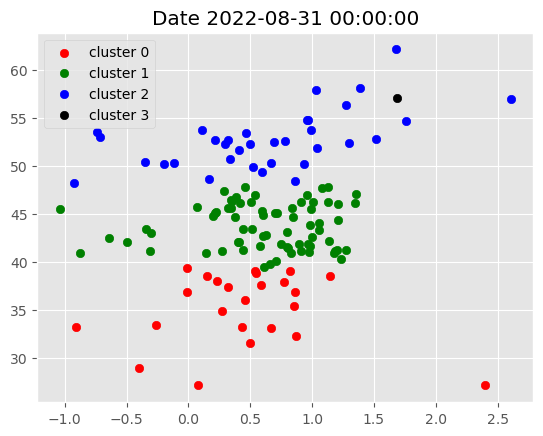

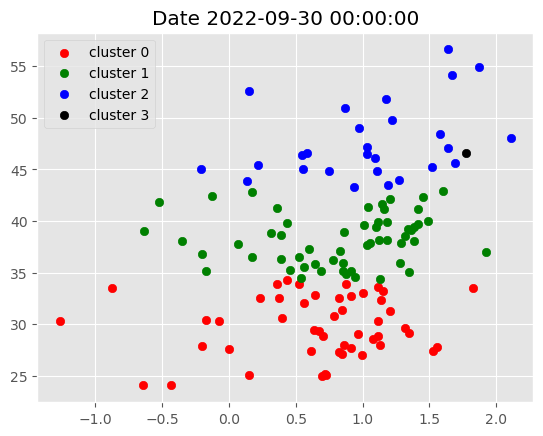

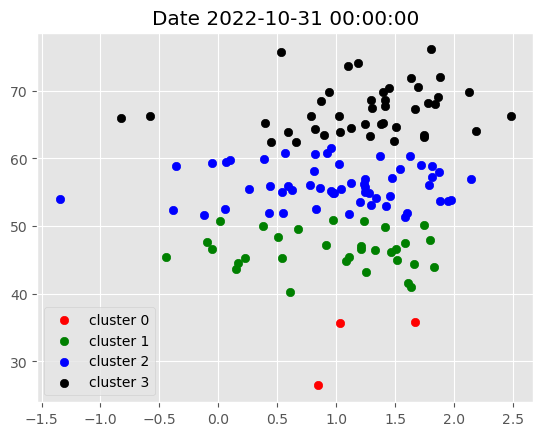

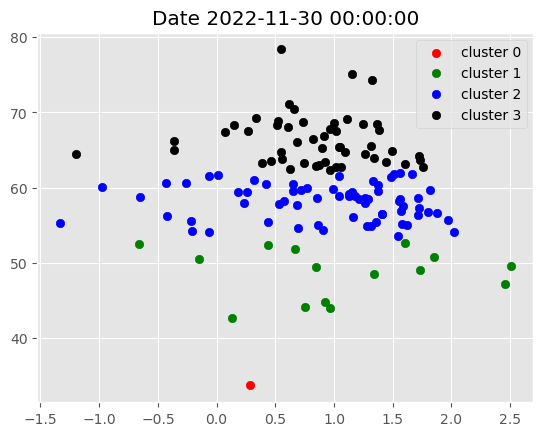

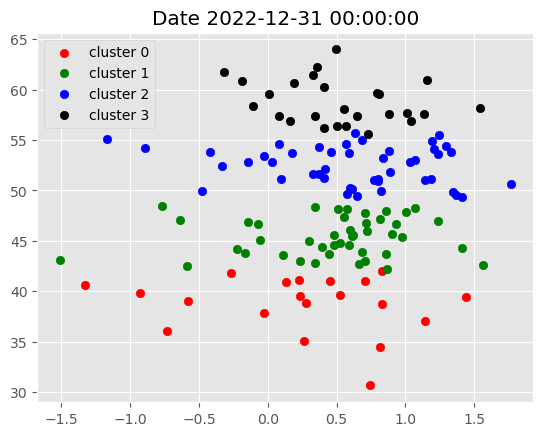

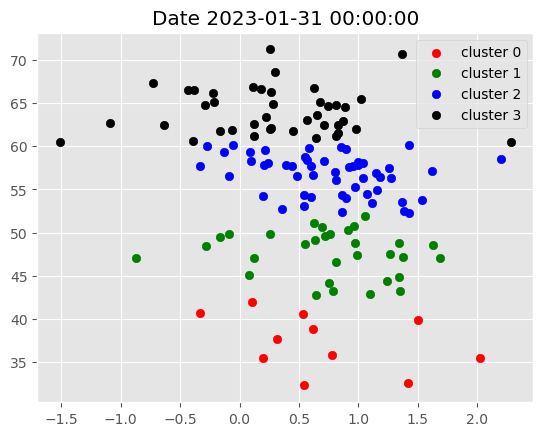

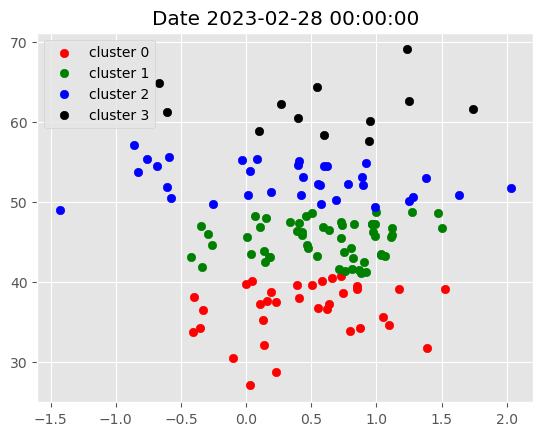

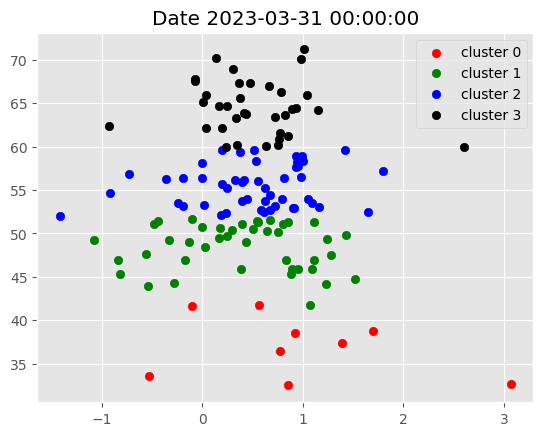

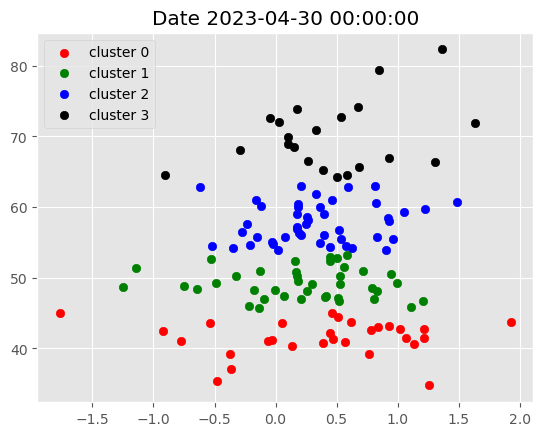

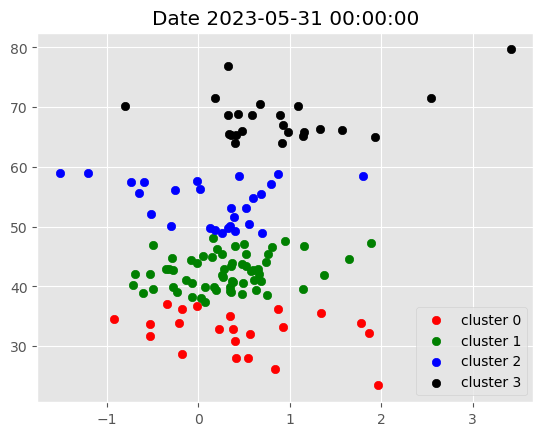

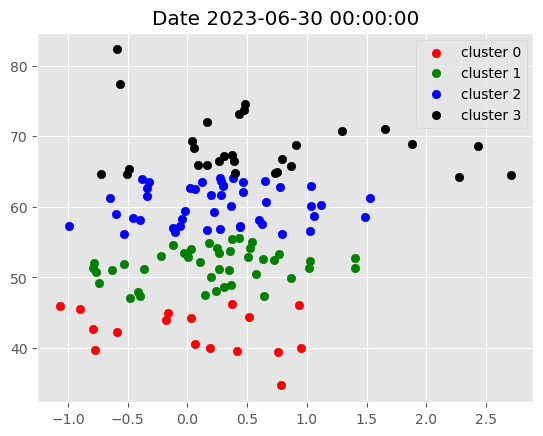

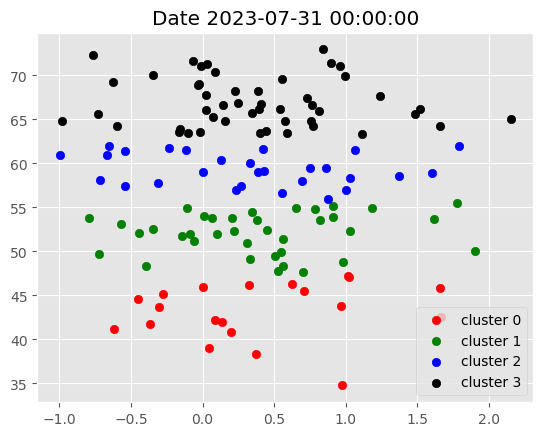

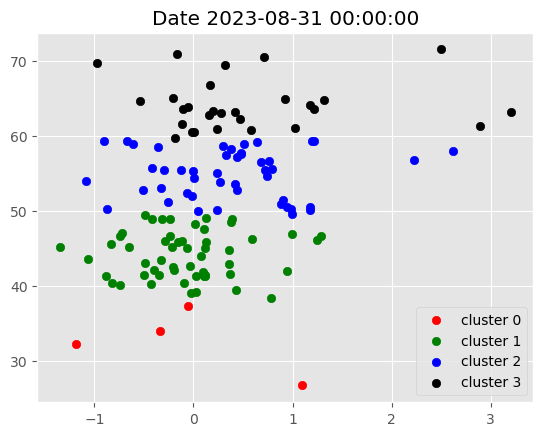

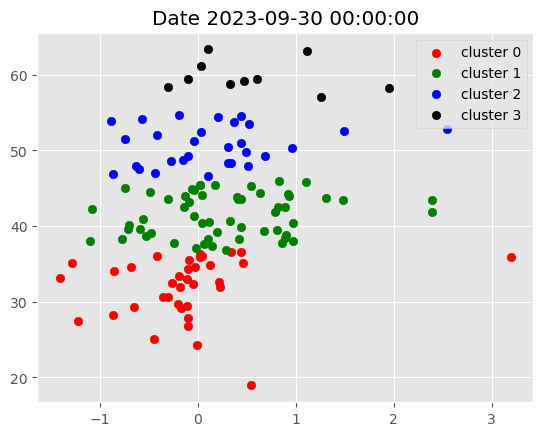

In [49]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [50]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

filtered_df = filtered_df.rename(columns={'ticker': 'Ticker'})

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2017-11-01': ['AAPL',
  'ACN',
  'ADBE',
  'AMAT',
  'AMZN',
  'AVGO',
  'AXP',
  'BAC',
  'CAT',
  'COP',
  'CRM',
  'CTSH',
  'DE',
  'DHR',
  'DLTR',
  'ELV',
  'EOG',
  'GOOG',
  'GOOGL',
  'INTC',
  'ISRG',
  'JPM',
  'LRCX',
  'MA',
  'MAR',
  'MCD',
  'META',
  'MMM',
  'MPC',
  'MSFT',
  'MU',
  'NEE',
  'NVDA',
  'NXPI',
  'ORCL',
  'PYPL',
  'SHW',
  'STZ',
  'TXN',
  'UNH',
  'V',
  'VLO',
  'WMT',
  'XOM'],
 '2017-12-01': ['AMZN',
  'AXP',
  'AZO',
  'BA',
  'BAC',
  'BRK-B',
  'CAT',
  'COST',
  'CSCO',
  'DE',
  'DLTR',
  'ELV',
  'HD',
  'HON',
  'JPM',
  'KR',
  'LUV',
  'MAR',
  'MMM',
  'NKE',
  'ORLY',
  'OXY',
  'SCHW',
  'UNH',
  'UNP',
  'VLO',
  'VZ',
  'WMT'],
 '2018-01-01': ['ACN',
  'AZO',
  'BA',
  'BAC',
  'BRK-B',
  'CAT',
  'COP',
  'CSCO',
  'CVX',
  'DAL',
  'DE',
  'DG',
  'DLTR',
  'EOG',
  'FCX',
  'FDX',
  'HAL',
  'HD',
  'KR',
  'LOW',
  'LUV',
  'MAR',
  'OXY',
  'PEP',
  'RTX',
  'SCHW',
  'STZ',
  'T',
  'TXN',
  'UAL',
  'UNP',
  'VLO',
  'VZ

In [51]:
pip install PyPortfolioOpt


Note: you may need to restart the kernel to use updated packages.


In [52]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [118]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0] - pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%***********************]  154 of 154 completed


Price            Close                                                 \
Ticker            AAPL        ABBV        ABT         ACN        ADBE   
Date                                                                    
2016-10-31   26.090458   38.834354  33.619484  101.760162  107.510002   
2016-11-01   25.619389   39.300838  33.456696  101.672623  106.870003   
2016-11-02   25.642363   39.537537  33.156841  103.834961  105.889999   
2016-11-03   25.367517   38.910942  32.882664  102.381729  107.169998   
2016-11-04   25.138844   39.015377  33.490971  102.626869  106.199997   
...                ...         ...        ...         ...         ...   
2023-09-25  174.569916  144.997559  94.104820  307.844971  511.600006   
2023-09-26  170.485275  144.303741  92.907623  301.649048  506.299988   
2023-09-27  168.968384  143.572433  92.231781  305.310303  502.600006   
2023-09-28  169.226166  142.747360  94.732376  292.092926  504.670013   
2023-09-29  169.741684  139.756439  93.506218  298.250031  509.899994   

Price                                                                   ...  \
Ticker             ADI         ADP        ADSK        ALGN        AMAT  ...   
Date                                                                    ...   
2016-10-31   54.423584   72.694206   72.279999   85.919998   26.432251  ...   
2016-11-01   53.999073   72.577316   70.099998   84.559998   26.268637  ...   
2016-11-02   54.050018   75.132408   68.680000   85.209999   25.986862  ...   
2016-11-03   54.211330   74.589645   67.610001   86.080002   25.695999  ...   
2016-11-04   53.854733   74.380920   69.440002   85.730003   25.650549  ...   
...                ...         ...         ...         ...         ...  ...   
2023-09-25  170.950928  232.211121  205.669998  298.019989  134.930298  ...   
2023-09-26  167.939835  229.521591  201.660004  299.010010  132.450806  ...   
2023-09-27  168.397827  234.736237  202.279999  301.679993  133.418884  ...   
2023-09-28  171.905930  235.394089  207.889999  307.510010  136.540482  ...   
2023-09-29  170.619629  232.752914  206.910004  305.320007  136.767700  ...   

Price        Volume                                                           \
Ticker          VLO     VRTX        VZ       WBA     WDAY      WDC       WFC   
Date                                                                           
2016-10-31  4969500  1928200  12459400   4662100  1147300  4449514  20115900   
2016-11-01  7816800  2458200  13229400   5130800  1091400  5055315  20020200   
2016-11-02  7317600  2580400  16488200   9783100  1127800  5578033  19566600   
2016-11-03  3855900  2371000  12605100   4586500   633300  4223810  14982700   
2016-11-04  3729900  1902100  14410200   7023900   892600  3579509  27391600   
...             ...      ...       ...       ...      ...      ...       ...   
2023-09-25  3241900   698100  17616900   6891000   894200  3553446  10624000   
2023-09-26  4936800   633600  18841600   7570500  1217300  4724565  15219400   
2023-09-27  3644000   860600  22083500  10182900  2338100  3370739  11815500   
2023-09-28  3587300   578900  18772100   7291500  9196300  4342086  12454600   
2023-09-29  4302200   896800  19759400  25659100  4066600  3323376  13119100   

Price                                    
Ticker           WMT     WYNN       XOM  
Date                                     
2016-10-31  19167000  1341600  16663800  
2016-11-01  26515800  3722300  13050600  
2016-11-02  22935900  2542400  11226100  
2016-11-03  20411700  9050400   8836500  
2016-11-04  21786300  3223800  13877100  
...              ...      ...       ...  
2023-09-25  10459500  1387800  11316000  
2023-09-26  14435700  1454000  11805400  
2023-09-27  15711000  2050000  23976200  
2023-09-28  11617200  1290400  16808100  
2023-09-29  18842400  1326800  18810700  

[1740 rows x 770 columns]

In [150]:
new_df_long = new_df.stack(level=1).reset_index()
new_df_long = new_df_long.rename(columns={'level_1': 'Ticker'})
new_df_long = new_df_long.set_index('Date')

In [152]:
new_df_long

Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2016-10-31,AAPL,26.090458,26.249014,26.012328,26.115735,105677600.0
2016-10-31,ABBV,38.834354,39.892587,38.792584,39.725500,14185800.0
2016-10-31,ABT,33.619484,33.876513,33.602348,33.782268,8241700.0
2016-10-31,ACN,101.760162,102.040300,101.086083,101.226149,1877800.0
2016-10-31,ADBE,107.510002,108.290001,107.040001,108.019997,1678400.0
...,...,...,...,...,...,...
2023-09-29,WDC,34.489796,34.897961,34.421768,34.807255,3323376.0
2023-09-29,WFC,39.048023,39.554519,38.780441,39.372946,13119100.0
2023-09-29,WMT,52.213684,53.258414,51.972087,53.225766,18842400.0


In [156]:
returns_dataframe = (
    new_df_long.sort_values(['Ticker', 'Date'])  # This line will now break, since 'Date' is index
               .groupby('Ticker')['Close']
               .apply(lambda x: np.log(x).diff())
               .reset_index(name='return')
)

returns_dataframe = returns_dataframe[['Date', 'Ticker', 'return']]

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        optimization_df = (
            new_df_long.loc[optimization_start_date:optimization_end_date]
                       .reset_index()  # reset to access Date
                       .query('Ticker in @cols')
                       .pivot(index='Date', columns='Ticker', values='Close')
        )

        success = False
        try:
            weights = optimize_weights(
                prices=optimization_df,
                lower_bound=round(1 / (len(optimization_df.columns) * 2), 3)
            )
            weights = pd.DataFrame(weights, index=[0])
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')

        if not success:
            weights = pd.DataFrame(
                [1 / len(optimization_df.columns) for _ in range(len(optimization_df.columns))],
                index=optimization_df.columns.tolist(),
                columns=[0]
            ).T

        temp_df = returns_dataframe[
            (returns_dataframe['Date'] >= start_date) &
            (returns_dataframe['Date'] <= end_date) &
            (returns_dataframe['Ticker'].isin(cols))
        ].copy()

        temp_df = temp_df.merge(
            weights.T.rename_axis('Ticker').reset_index().rename(columns={0: 'weight'}),
            on='Ticker',
            how='left'
        )

        temp_df['weighted_return'] = temp_df['return'] * temp_df['weight']

        strat_df = temp_df.groupby('Date')['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, strat_df])

    except Exception as e:
        print(f"Error on {start_date}: {e}")

portfolio_df = portfolio_df.drop_duplicates()


portfolio_df

Max Sharpe Optimization failed for 2018-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-10-01, Continuing with Equal-Weights


,Strategy Return
Date,
2017-11-01,0.001129
2017-11-02,0.003020
2017-11-03,0.006493
2017-11-06,0.002676
2017-11-07,0.003205
...,...
2023-09-25,0.003956
2023-09-26,-0.011183
2023-09-27,0.005795


In [158]:
new_df_long

Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2016-10-31,AAPL,26.090458,26.249014,26.012328,26.115735,105677600.0
2016-10-31,ABBV,38.834354,39.892587,38.792584,39.725500,14185800.0
2016-10-31,ABT,33.619484,33.876513,33.602348,33.782268,8241700.0
2016-10-31,ACN,101.760162,102.040300,101.086083,101.226149,1877800.0
2016-10-31,ADBE,107.510002,108.290001,107.040001,108.019997,1678400.0
...,...,...,...,...,...,...
2023-09-29,WDC,34.489796,34.897961,34.421768,34.807255,3323376.0
2023-09-29,WFC,39.048023,39.554519,38.780441,39.372946,13119100.0
2023-09-29,WMT,52.213684,53.258414,51.972087,53.225766,18842400.0


<Axes: xlabel='Date'>

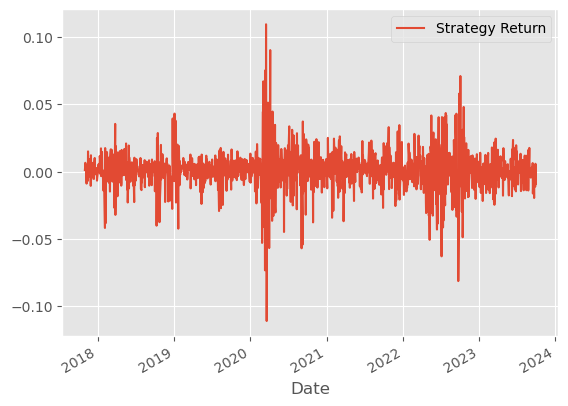

In [160]:
portfolio_df.plot()

In [172]:
spy = yf.download(
    tickers='SPY',
    start='2015-01-01',
    end=dt.date.today()
)

spy_ret = np.log(spy['Close']).diff().dropna()
spy_ret.name = 'SPY Buy&Hold'  # <-- just name the Series

portfolio_df = portfolio_df.merge(spy_ret, left_index=True, right_index=True, how='left')

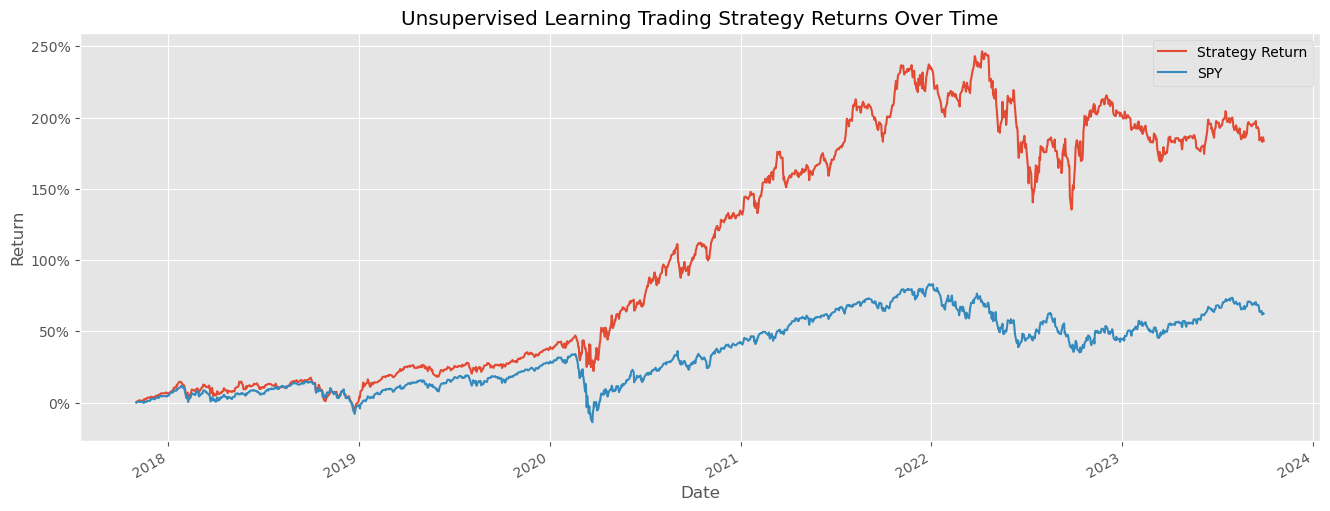

In [174]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()